In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [26]:
# def gaussiana(x, sigma, mi):
#     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - mi)**2/(2*sigma**2)) + 600

def gaussiana(x, sigma, mi, a, H):
    return a*np.exp(-(x - mi)**2/(2*sigma**2)) + H

def gaussiana_fit(dados_x, dados_y):

    media = sum(dados_x*dados_y)/sum(dados_y)
    sigma =np.sqrt(sum(dados_y* (dados_x - media)**2)/sum(dados_y))
    popt, pcov = curve_fit(
    f = gaussiana,
    xdata = dados_x,
    ydata = dados_y,
    p0 = [media, sigma, 1000, 100]
)
    return [popt, np.sqrt(np.diag(pcov))]

In [27]:
gauss_nacl = pd.read_csv('./Dados/nacl_grande.csv',sep='\s', decimal=',')
gauss_nacl_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_y = np.array(gauss_nacl['R'])
c = 299792458
h = 4.135668e-15
d = 2.82e-10
gauss_nacl_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_x * np.pi/180))


C:\Users\victo\AppData\Local\Temp\ipykernel_9144\940955253.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados/nacl_grande.csv',sep='\s', decimal=',')


Plot

In [28]:
par = gaussiana_fit(gauss_nacl_x[35:45], gauss_nacl_y[35:45])
par[1]

array([1.36697477e-02, 1.09182961e-02, 6.40590111e+01, 3.61110352e+01])

In [29]:
par = gaussiana_fit(gauss_nacl_x[35:45], gauss_nacl_y[35:45])
x_model = np.linspace(min(gauss_nacl_x[35:45]), max(gauss_nacl_x[35:45]))  
gaussiana(x_model, par[0][0], par[0][1], par [0][2], par[0][3])



array([ 566.84724364,  567.2371025 ,  567.89628777,  568.98239439,
        570.72591595,  573.45229466,  577.60422455,  583.7602986 ,
        592.64439165,  605.11877161,  622.15337826,  644.76461657,
        673.91989898,  710.4092563 ,  754.69231872,  806.73689226,
        865.87263177,  930.68794506,  998.99830697, 1067.90829335,
       1133.97772511, 1193.48572669, 1242.76811706, 1278.58720834,
       1298.48272319, 1301.05113277, 1286.10937605, 1254.71643348,
       1209.04922351, 1152.15302385, 1087.60615658, 1019.15014415,
        950.33805071,  884.24572869,  823.27570524,  769.06523172,
        722.49255694,  683.76199218,  652.54065548,  628.11819809,
        609.5642978 ,  595.86542368,  586.03030064,  579.16088719,
        574.49137573,  571.40124932,  569.4098685 ,  568.15987134,
        567.39545526,  566.93994866])

In [30]:
par[1][0]

0.013669747684205391

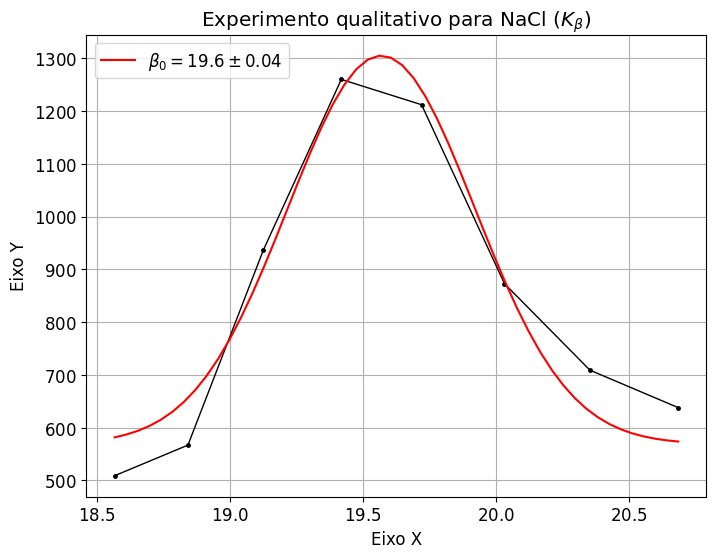

In [31]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$\\beta_0 = {par[0][1]:.3} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x_e[36:44], gauss_nacl_y[36:44], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_nacl_x_e[36:44], gauss_nacl_y[36:44], 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Eixo X') # eixo x
grafico.set_ylabel('Eixo Y') # eixo y
grafico.set_title('Experimento qualitativo para NaCl ($K_\\beta$)') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


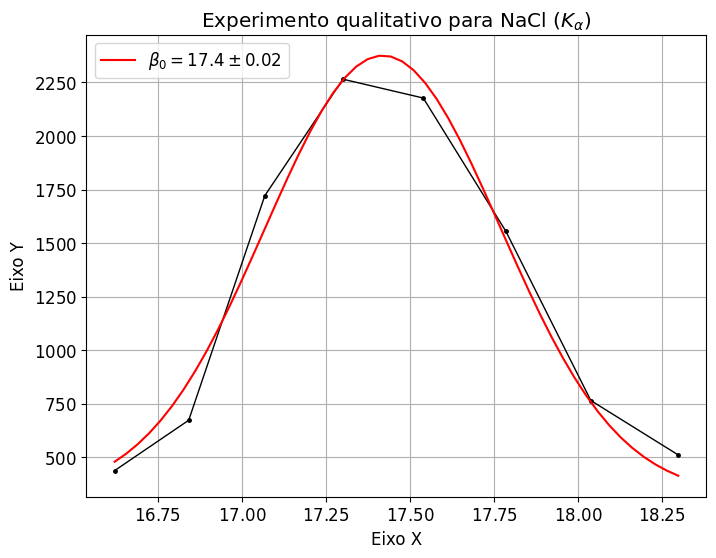

In [34]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$\\beta_0 = {par[0][1]:.3} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x_e[44:52], gauss_nacl_y[44:52], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_nacl_x_e[44:52], gauss_nacl_y[44:52], 'red')

#grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Eixo X') # eixo x
grafico.set_ylabel('Eixo Y') # eixo y
grafico.set_title('Experimento qualitativo para NaCl ($K_\\alpha$)') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


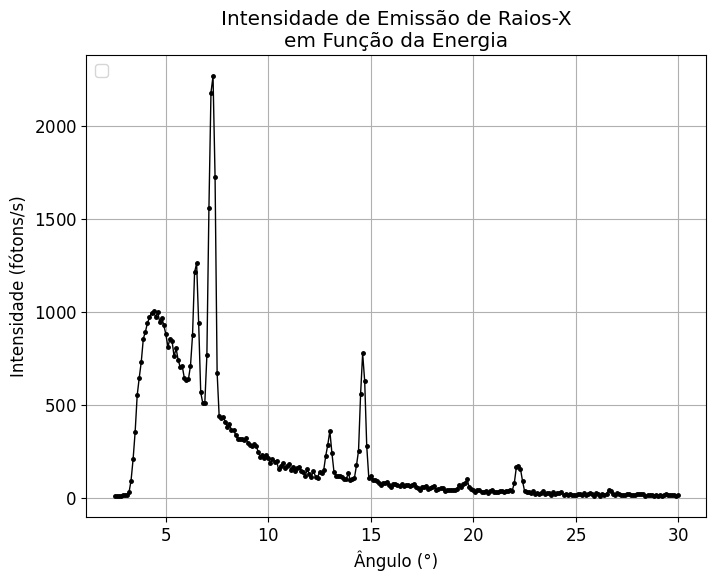

In [33]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$\\beta_0 = {par[0][1]:.3} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
# gaussiana_plot(gauss_nacl_x[44:52], gauss_nacl_y[44:52], 'red')

#grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Ângulo (°)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X\nem Função da Energia') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
